In [1]:
# Imports
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas as pd
from scipy.ndimage.measurements import center_of_mass as CoM # Scipy center of mass function

In [2]:
# Set the size of the image data to be analyzed
imsize = 64

In [3]:
# Set paths for loading and saving data
data_root = "/home/plutku01/data/cv/single_particle/train/larcv_png_{}/larcv_png_{}/".format(imsize, imsize)

# Path to old datasets
# data_root = "/media/disk1/kai/larcv_png_data/larcv_png_{}/larcv_png_{}/".format(imsize, imsize)

In [4]:
# Set up variables for logging results
images = []

In [5]:
# Centroid calcuations
centroids_x = []; centroids_y = []

In [6]:
# Percentage calculations
pix_totals = []; p_fill = []

In [7]:
# Set limit on image data loading for testing
limit = 16

In [8]:
# Load the image data
print("Loading images from {}".format(data_root))

samples1 = []; samples2 = []
for idx, image_path in enumerate(os.listdir(data_root)):
    if idx == limit:
        break
    in_path = os.path.join(data_root, image_path)
    if idx % 2 == 0:
        samples2.append(cv.imread(in_path, 0))
    else:
        samples1.append(cv.imread(in_path, 0))

print("Finished loading {} images".format(len(images)))

Loading images from /home/plutku01/data/cv/single_particle/train/larcv_png_64/larcv_png_64/
Finished loading 0 images


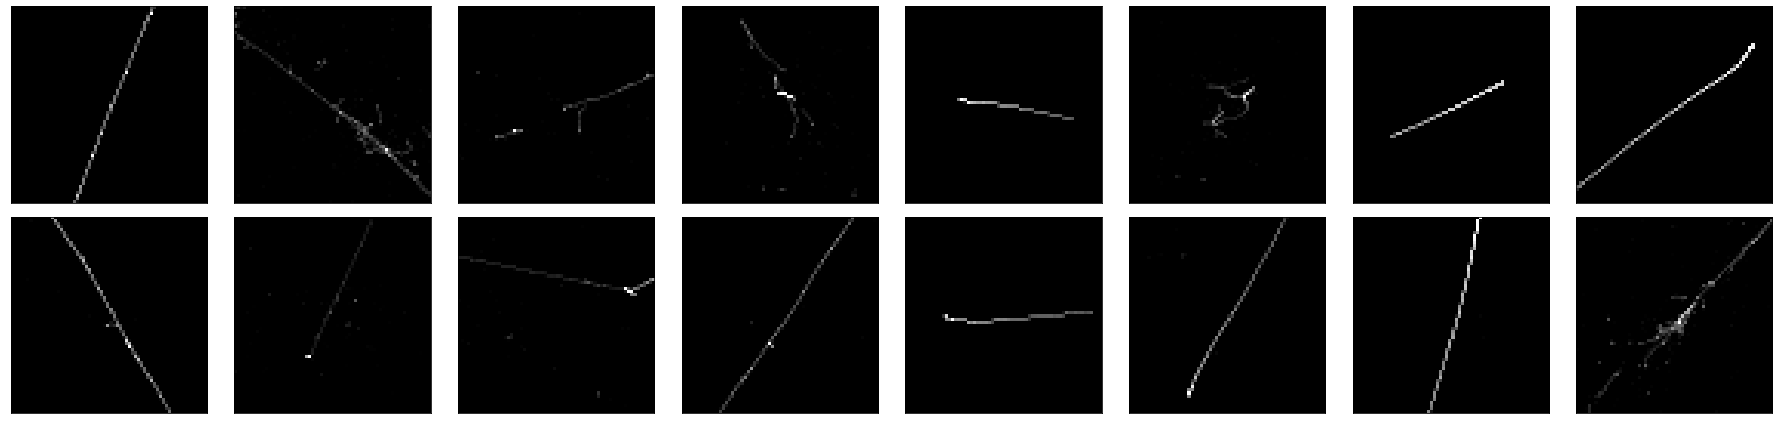

In [9]:
# Setup figure
fig, axes = plt.subplots(nrows = 2, ncols = 8, sharex=True, sharey=True, figsize=(25,6))

# Set title
m_label = f'LArCV1 [{imsize}x{imsize}] Data Images'

# Generate plot

# Generate plot
for images, row in zip([samples1, samples2], axes):
    for img, ax in zip(images, row):
        img = np.reshape(img, (imsize, imsize))
#         img[img <= -0.25] = 0
        ax.imshow(img, cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.tick_params(axis='x', colors='#443941')
        ax.tick_params(axis='y', colors='#443941')
fig.tight_layout()

# Save figure
save_file = f'LArCV1_[{imsize}x{imsize}]_Data_Image_Samples.png'
plt.savefig(save_file, dpi=300)

In [10]:
# Perform analysis of the image data
for image in images:
    # Get the weighted centroid position
    com = CoM(image)
    
    # check if computation returned NaN -- happens when centroid location is non-sensical
    if com[0] != com[0]:
        del image
        continue
    else:
        centroids_x.append(int(com[0]))
        centroids_y.append(int(com[1]))
    
    # Binarize the image in order to compute the percentage filled
    image = np.where(image > 0.0, 1.0, 0.0)
    pix_totals.append( np.sum(image) )
    p_fill.append( round(pix_totals[-1] / (imsize**2), 2) )

In [11]:
# Compute summary values
avg_fill = round(np.mean(p_fill), 3)
avg_x = round(np.mean(centroids_x), 2)
avg_y = round(np.mean(centroids_y), 2)

In [12]:
# Print out summary of data analysis
print("Completed analysis of LArCV_{} dataset using {} images".format(imsize, len(images)))
print("The average fill percentage is: {}".format(avg_fill))
print("The average centroid location is: ({},{})".format(avg_x, avg_y))

Completed analysis of LArCV_64 dataset using 8 images
The average fill percentage is: 0.03
The average centroid location is: (29.25,33.62)


### Plot the location densities of the image centroids

In [13]:
# Set plotting limits
x_mid = int(np.mean(centroids_x))
y_mid = int(np.mean(centroids_y))
x_shift = int(0.3 * x_mid); y_shift = int(0.3 * y_mid)
x1 = x_mid - x_shift; x2 = x_mid + x_shift
y1 = y_mid - y_shift; y2 = y_mid + y_shift
print(x_mid, y_mid)
print(x1, x2, y1, y2)

29 33
21 37 24 42


In [14]:
# Centroid denisty data
df = pd.DataFrame( {'x': centroids_x, 'y' : centroids_y} )

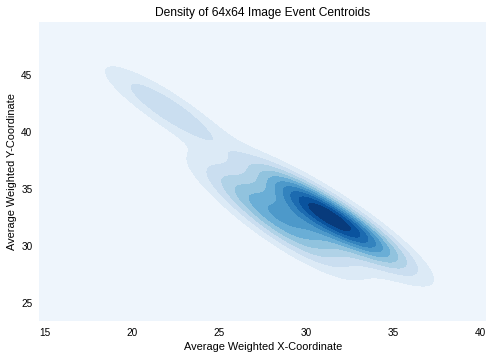

In [15]:
# Plot
plt.style.use('seaborn')
plt.title('Density of {}x{} Image Event Centroids'.format(imsize, imsize), fontsize = "large", color="black")


# Density plot
sns.kdeplot(df.x, df.y, cmap="Blues", shade=True, gridsize=250)

# Set axes limits
# plt.xlim(x1, x2); plt.ylim(y1, y2)

# Set labels and tick colors
plt.ylabel("Average Weighted Y-Coordinate", color = "black")
plt.xlabel("Average Weighted X-Coordinate", color = "black")
plt.xticks(color="black")
plt.yticks(color="black")

plt.savefig("centroid_density_plot_scipy_cropped_{}_images.png".format(imsize), dpi=300, facecolor='#443941')

### Plot the fill percentages of the dataset

In [16]:
# Set plotting limits
x_min = int(min(pix_totals))
x_mid = int(np.mean(pix_totals))

y_min = int(min(p_fill))
y_mid = round(np.mean(p_fill), 3)

x_shift = int(0.3 * x_mid); y_shift = 0.3 * y_mid
x1 = x_mid - x_shift; x2 = x_mid + x_shift
y1 = round(y_mid - y_shift, 4); y2 = round(y_mid + y_shift, 4)
print(x_min, x_mid, y_min, y_mid, x_shift, y_shift)
print(x1, x2, y1, y2)

53 121 0 0.03 36 0.009
85 157 0.021 0.039


In [17]:
# Data for fill percentage calculation
df = pd.DataFrame( {'x' : pix_totals, 'y' : p_fill} )

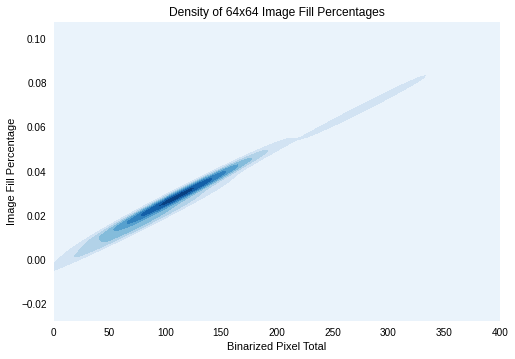

In [18]:
# Plot
sns.kdeplot(df.x, df.y, cmap="Blues", shade=True, gridsize=250)
# Set axes limits
plt.xlim(0, 400)
# plt.ylim(y_min, 0.5)

plt.title('Density of {}x{} Image Fill Percentages'.format(imsize, imsize), fontsize = "large", color="black")
plt.xlabel("Binarized Pixel Total", color = "black")
plt.ylabel("Image Fill Percentage", color = "black")
plt.xticks(color="black")
plt.yticks(color="black")

plt.savefig("p-fill_density_plot_scipy_cropped_{}_images.png".format(imsize), dpi=300, facecolor='#443941')

In [19]:
'''
# Plot the fill percentages of the entire dataset
 fig, axes = plt.subplots(1,1)
 fig.suptitle("Percentage of Pixels above Zero Value", color = "white")

 axes.set_title("[{}x{}] LArCV1 Dataset".format(imsize, imsize), color="white", fontsize="small")
 axes.set_xlabel("Total Binarized Image Pixel Value")
 axes.set_ylabel("Image Fill Percentage")
 axes.set_facecolor("#443941")

# Stylize
 axes.spines['bottom'].set_color('white')
 axes.spines['top'].set_color('white')
 axes.spines['left'].set_color('white')
 axes.spines['right'].set_color('white')
 axes.xaxis.label.set_color('white')
 axes.yaxis.label.set_color('white')
 axes.tick_params(axis='x', colors='white')
 axes.tick_params(axis='y', colors='white')

 # Plot data
 axes.set_xlim(x_ll, x_ul)
 axes.set_ylim(y_ll, y_ul)
 axes.scatter(pix_totals, p_fill)

 # Generate and save image
 plt.savefig("p_fill_{}_dataset.png".format(imsize), dpi=300, facecolor='#443941')
 '''

'\n# Plot the fill percentages of the entire dataset\n fig, axes = plt.subplots(1,1)\n fig.suptitle("Percentage of Pixels above Zero Value", color = "white")\n\n axes.set_title("[{}x{}] LArCV1 Dataset".format(imsize, imsize), color="white", fontsize="small")\n axes.set_xlabel("Total Binarized Image Pixel Value")\n axes.set_ylabel("Image Fill Percentage")\n axes.set_facecolor("#443941")\n\n# Stylize\n axes.spines[\'bottom\'].set_color(\'white\')\n axes.spines[\'top\'].set_color(\'white\')\n axes.spines[\'left\'].set_color(\'white\')\n axes.spines[\'right\'].set_color(\'white\')\n axes.xaxis.label.set_color(\'white\')\n axes.yaxis.label.set_color(\'white\')\n axes.tick_params(axis=\'x\', colors=\'white\')\n axes.tick_params(axis=\'y\', colors=\'white\')\n\n # Plot data\n axes.set_xlim(x_ll, x_ul)\n axes.set_ylim(y_ll, y_ul)\n axes.scatter(pix_totals, p_fill)\n\n # Generate and save image\n plt.savefig("p_fill_{}_dataset.png".format(imsize), dpi=300, facecolor=\'#443941\')\n '